In [1]:
import numpy as np

# Binomial confidence bounds

In [2]:
from conbo import binomial_bounds

In [3]:
samples = np.random.binomial(1, 0.5, 1_000)
binomial_bounds(samples)

(0.46781569303370923, 0.5500974400749117)

# CDF confidence bounds

In [4]:
from conbo import cdf_bounds

In [5]:
samples = np.random.normal(0, 1, 1_000)[np.newaxis]
x = np.arange(-4, 4, 0.01)
cdf, cdf_lower, cdf_upper = cdf_bounds(samples, x)

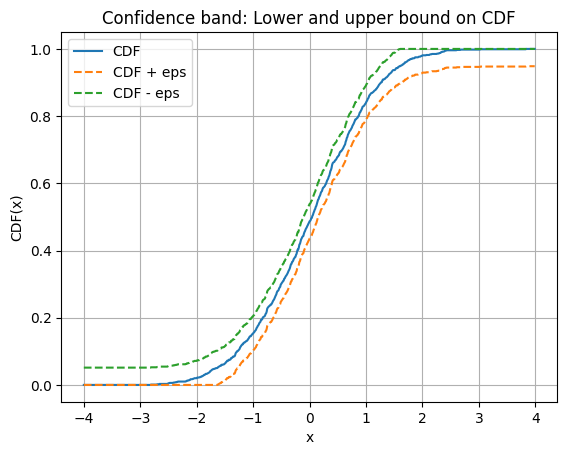

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x, cdf, label='CDF')
plt.plot(x, cdf_lower, label='CDF + eps', linestyle='--')
plt.plot(x, cdf_upper, label='CDF - eps', linestyle='--')
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.title('Confidence band: Lower and upper bound on CDF')
plt.legend()
plt.grid(True)
plt.show()

# Expectation confidence bound

In [10]:
from conbo import expectation_bounds

In [11]:
samples = np.random.uniform(0, 1, 1_000)
sample_mean, exp_lower, exp_upper = expectation_bounds(samples)

In [12]:
print(f'Sample mean: {sample_mean}')
print(f'Lower bound on expectation: {exp_lower}')
print(f'Upper bound on expectation: {exp_upper}')

Sample mean: 0.49638240349593743
Lower bound on expectation: 0.4415282020472413
Upper bound on expectation: 0.5511586666396274


# Variance and standard deviation bounds

In [13]:
from conbo import variance_bounds, std_bounds

In [14]:
samples = np.random.uniform(0, 1, 1_000)
sample_variance, var_lower, var_upper = variance_bounds(samples)

In [15]:
print(f'Sample variance: {sample_variance}')
print(f'Lower bound on variance: {var_lower}')
print(f'Upper bound on variance: {var_upper}')

Sample variance: 0.08004397635002897
Lower bound on variance: 0.023954667152565334
Upper bound on variance: 0.14412423661157567


In [16]:
sample_std, std_lower, std_upper = std_bounds(samples)
print(f'Sample standard deviation: {sample_std}')
print(f'Lower bound on standard deviation: {std_lower}')
print(f'Upper bound on standard deviation: {std_upper}')

Sample standard deviation: 0.2829204417323516
Lower bound on standard deviation: 0.1547729535563799
Upper bound on standard deviation: 0.3796369800369501


# Batching (computing bounds for multiple unknown distributions)

In [17]:
from conbo import *

In [18]:
# simulate sampling from two different distributions
samples = np.vstack([np.random.beta(1, 5, 1_000), 
                    np.random.beta(5, 1, 1_000)]) # exp = 5/6

In [19]:
cdf, cdf_lower, cdf_upper = cdf_bounds(samples, x=[0.5])
sample_mean, exp_lower, exp_upper = expectation_bounds(samples)
sample_variance, var_lower, var_upper = variance_bounds(samples)
sample_std, std_lower, std_upper = std_bounds(samples)

In [20]:
print(f'Distribution 1 (expectation = 1/6 ~= {1/6}):')
print(f'- Sample mean: {sample_mean[0]}')
print(f'- Lower bound on expectation: {exp_lower[0]}')
print(f'- Upper bound on expectation: {exp_upper[0]}')
print()
print(f'Distribution 2 (expectation = 5/6 ~= {5/6}):')
print(f'- Sample mean: {sample_mean[1]}')
print(f'- Lower bound on expectation: {exp_lower[1]}')
print(f'- Upper bound on expectation: {exp_upper[1]}')

Distribution 1 (expectation = 1/6 ~= 0.16666666666666666):
- Sample mean: 0.16097219205478536
- Lower bound on expectation: 0.1293110194542313
- Upper bound on expectation: 0.21714735263824725

Distribution 2 (expectation = 5/6 ~= 0.8333333333333334):
- Sample mean: 0.8257269888555818
- Lower bound on expectation: 0.7697064859631081
- Upper bound on expectation: 0.8591126164743716
